In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/financial-risk-for-loan-approval/Loan.csv
/kaggle/input/financial-risk-for-loan-approval/CSV Generation.py


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# For better aesthetics
plt.style.use('seaborn-darkgrid')


/tmp/ipykernel_17/1370804234.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [3]:
df = pd.read_csv('/kaggle/input/financial-risk-for-loan-approval/Loan.csv')

df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [5]:
# Checking missing values
df.isnull().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [6]:
# Summary statistics for numerical columns
df.describe()

# Summary for categorical variables
df['LoanPurpose'].value_counts()


LoanPurpose
Home                  5925
Debt Consolidation    5027
Auto                  4034
Education             3008
Other                 2006
Name: count, dtype: int64

In [7]:
df['EmploymentStatus'].value_counts()

EmploymentStatus
Employed         17036
Self-Employed     1573
Unemployed        1391
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


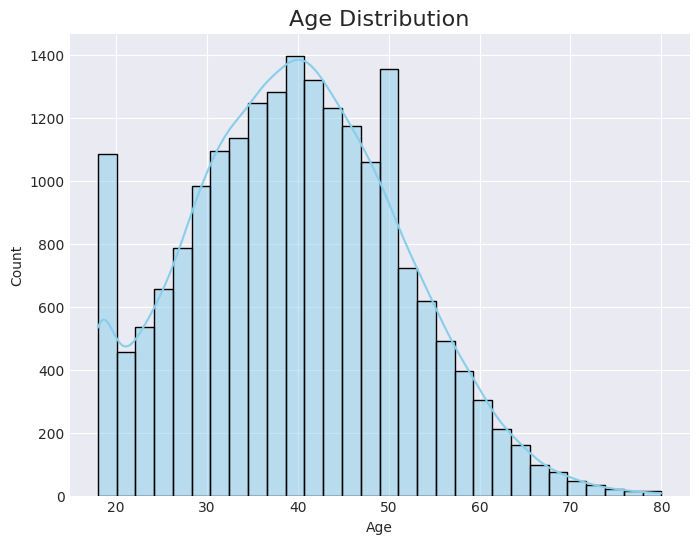

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


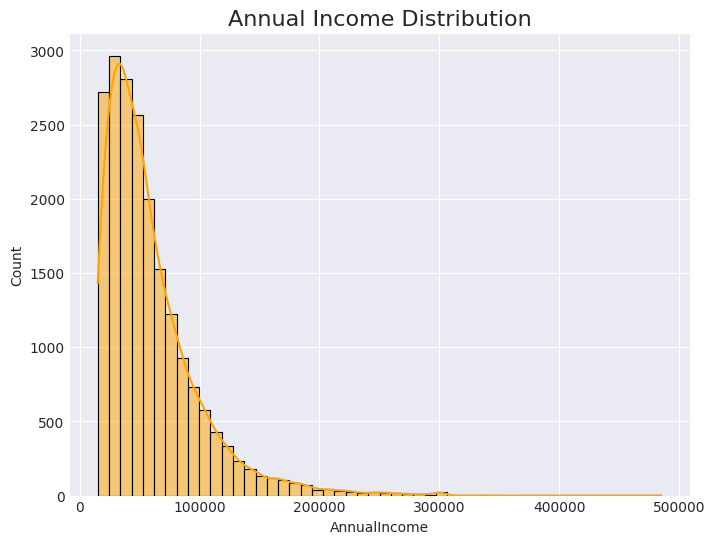

In [8]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution', fontsize=16)
plt.show()

# Annual Income Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['AnnualIncome'], bins=50, kde=True, color='orange')
plt.title('Annual Income Distribution', fontsize=16)
plt.show()


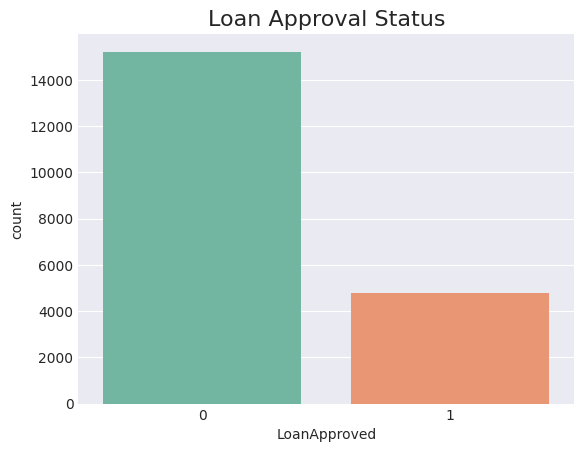

In [9]:
# Loan Approved Count Plot
sns.countplot(x='LoanApproved', data=df, palette='Set2')
plt.title('Loan Approval Status', fontsize=16)
plt.show()


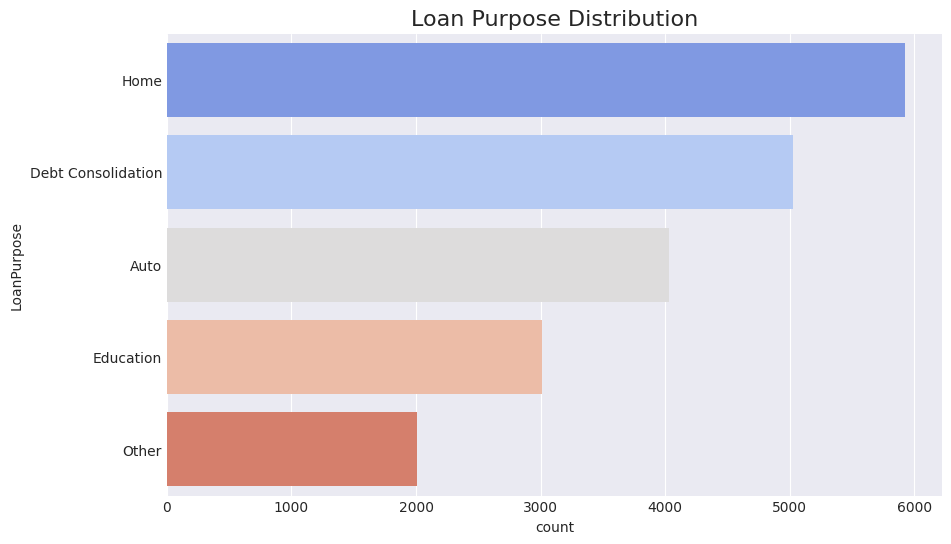

In [10]:
# Count plot for Loan Purpose
plt.figure(figsize=(10, 6))
sns.countplot(y='LoanPurpose', data=df, order=df['LoanPurpose'].value_counts().index, palette='coolwarm')
plt.title('Loan Purpose Distribution', fontsize=16)
plt.show()


In [11]:
# Interactive scatter plot
fig = px.scatter(df, x='Age', y='LoanAmount', color='EmploymentStatus', size='AnnualIncome', hover_data=['LoanDuration'])
fig.update_layout(title='Age vs Loan Amount with Employment Status', title_x=0.5)
fig.show()


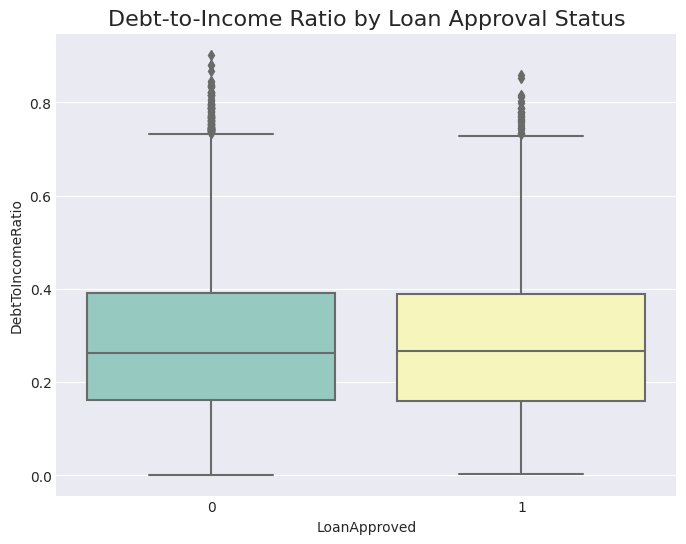

In [12]:
# Debt-to-Income Ratio vs Loan Approved
plt.figure(figsize=(8, 6))
sns.boxplot(x='LoanApproved', y='DebtToIncomeRatio', data=df, palette='Set3')
plt.title('Debt-to-Income Ratio by Loan Approval Status', fontsize=16)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 800x600 with 0 Axes>

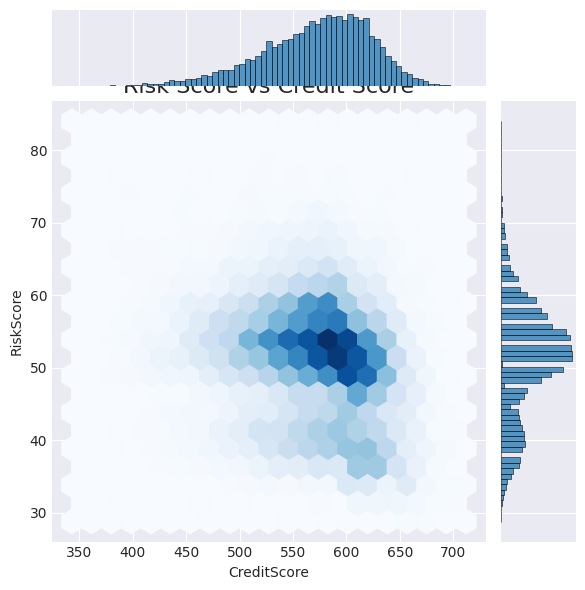

In [13]:
# Joint distribution of RiskScore and CreditScore
plt.figure(figsize=(8,6))
sns.jointplot(x='CreditScore', y='RiskScore', data=df, kind='hex', gridsize=20, cmap='Blues')
plt.title('Risk Score vs Credit Score', fontsize=16)
plt.show()


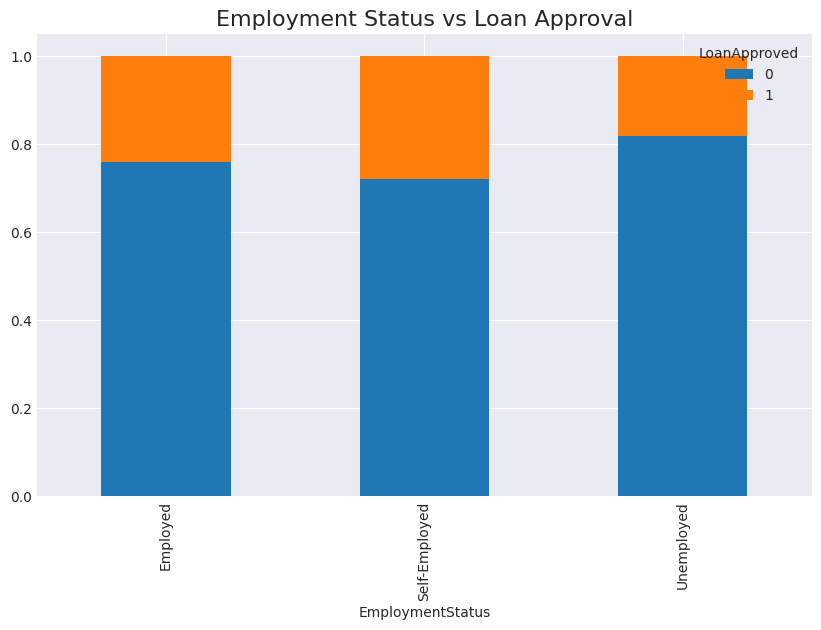

In [14]:
# Stacked bar plot for Employment Status
employment_approval = pd.crosstab(df['EmploymentStatus'], df['LoanApproved'])
employment_approval.div(employment_approval.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Employment Status vs Loan Approval', fontsize=16)
plt.show()


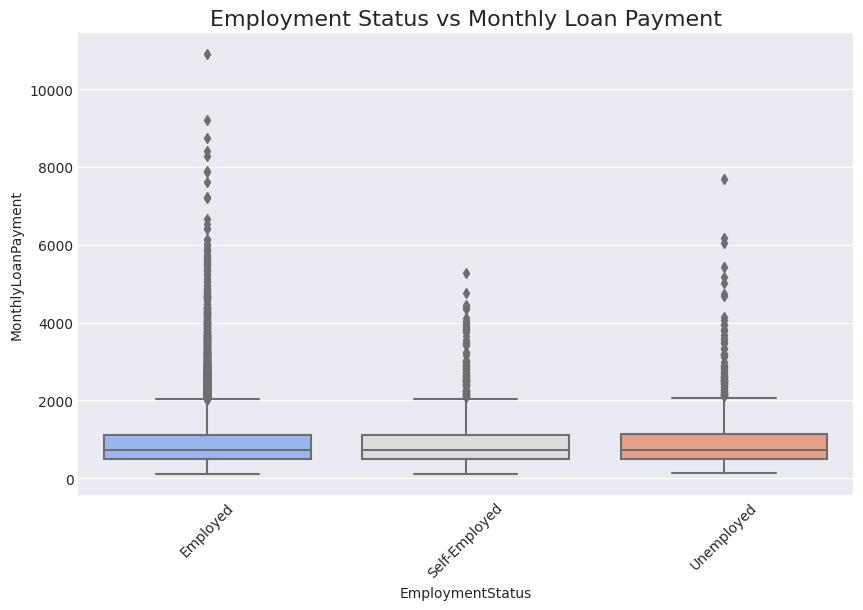

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='EmploymentStatus', y='MonthlyLoanPayment', data=df, palette='coolwarm')
plt.title('Employment Status vs Monthly Loan Payment', fontsize=16)
plt.xticks(rotation=45)
plt.show()


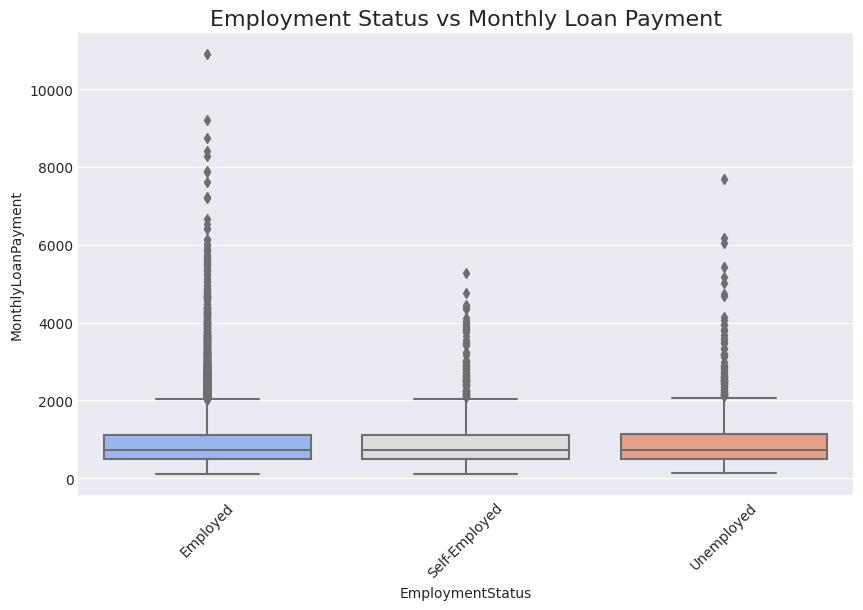

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='EmploymentStatus', y='MonthlyLoanPayment', data=df, palette='coolwarm')
plt.title('Employment Status vs Monthly Loan Payment', fontsize=16)
plt.xticks(rotation=45)
plt.show()


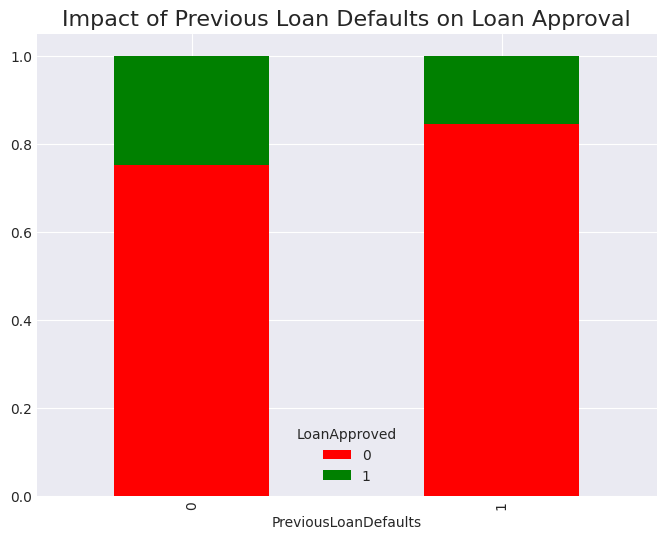

In [17]:
default_approval = pd.crosstab(df['PreviousLoanDefaults'], df['LoanApproved'])
default_approval.div(default_approval.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(8, 6), color=['red', 'green'])
plt.title('Impact of Previous Loan Defaults on Loan Approval', fontsize=16)
plt.show()


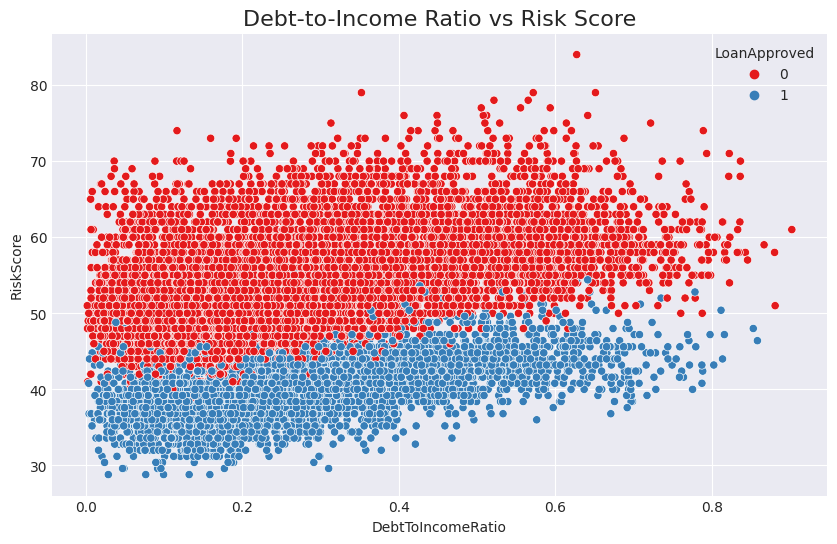

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DebtToIncomeRatio', y='RiskScore', hue='LoanApproved', palette='Set1', data=df)
plt.title('Debt-to-Income Ratio vs Risk Score', fontsize=16)
plt.show()


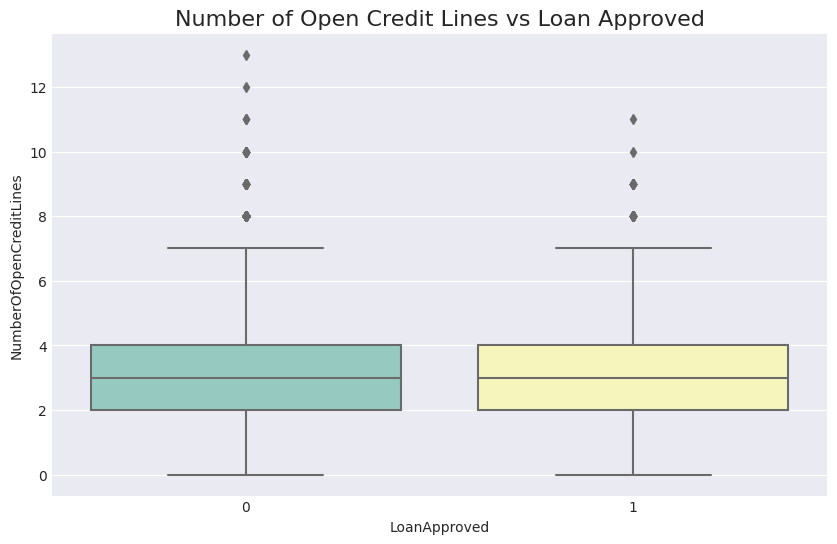

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='LoanApproved', y='NumberOfOpenCreditLines', data=df, palette='Set3')
plt.title('Number of Open Credit Lines vs Loan Approved', fontsize=16)
plt.show()


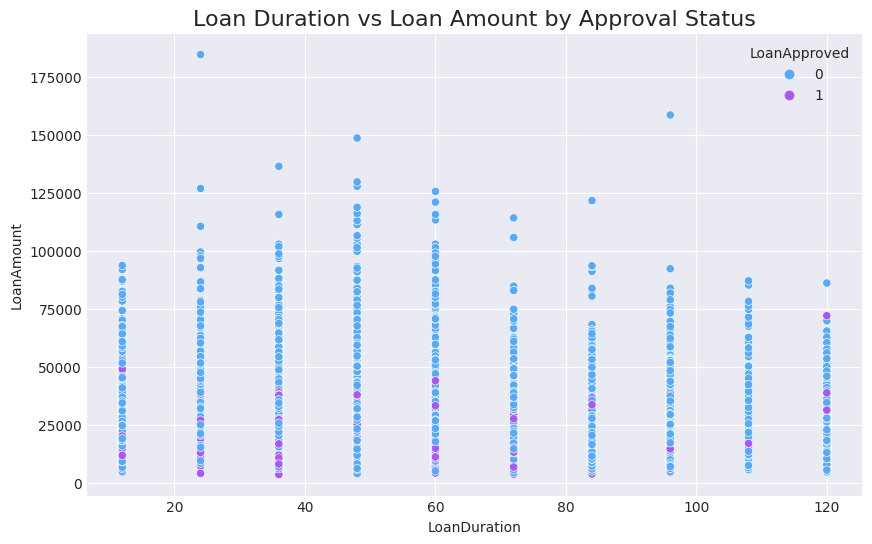

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LoanDuration', y='LoanAmount', hue='LoanApproved', palette='cool', data=df)
plt.title('Loan Duration vs Loan Amount by Approval Status', fontsize=16)
plt.show()


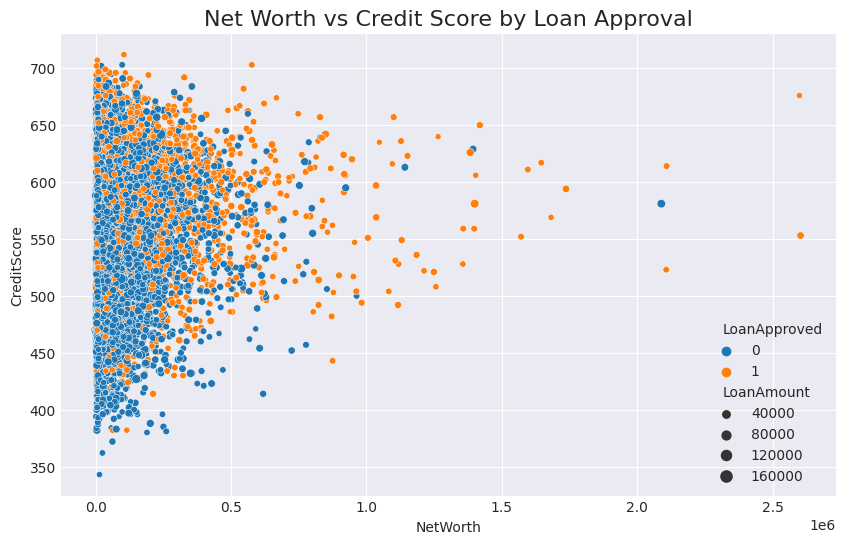

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NetWorth', y='CreditScore', hue='LoanApproved', size='LoanAmount', data=df)
plt.title('Net Worth vs Credit Score by Loan Approval', fontsize=16)
plt.show()


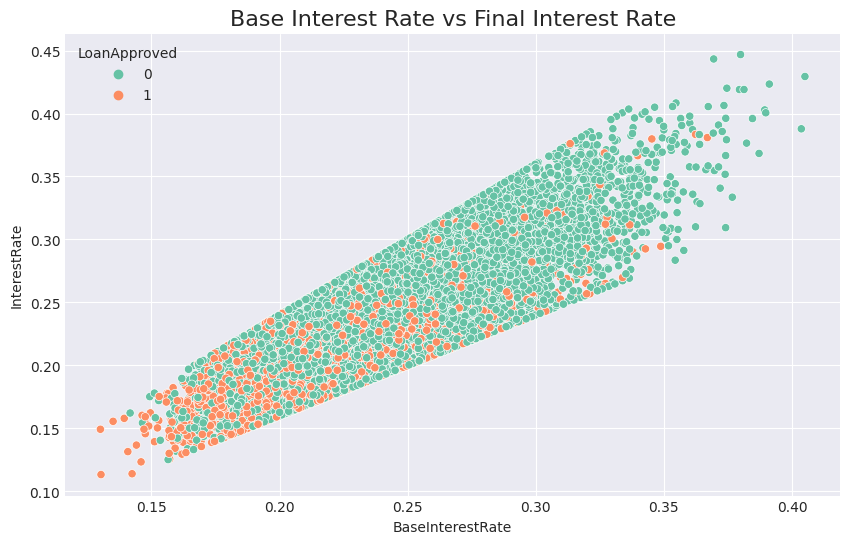

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BaseInterestRate', y='InterestRate', hue='LoanApproved', palette='Set2', data=df)
plt.title('Base Interest Rate vs Final Interest Rate', fontsize=16)
plt.show()
